<a href="https://colab.research.google.com/github/ridho237/image-processing/blob/main/Pengolahan_Citra_M4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Importing Python Packages**

In [4]:
from PIL import Image
import colorsys
import numpy as np
import matplotlib.pyplot as plt

## **2. Membuka Gambar**


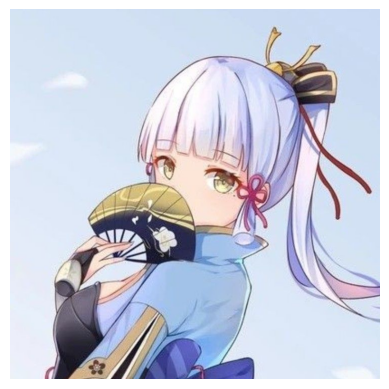

In [5]:
img = Image.open('ayaka!.jpg')
img.show()

plt.imshow(img)
plt.axis('off')
plt.show()

## **3. Mendapatkan ukuran gambar dan total piksel**


In [7]:
width, height = img.size
total_pixels = width * height

print(f"Ukuran gambar: {width}x{height}")
print(f"Total piksel: {total_pixels}")

Ukuran gambar: 736x736
Total piksel: 541696


## **4. Menginisialisasi histogram untuk H, S, L dan Grayscale**


In [8]:
hue_histogram = [0] * 360
saturation_histogram = [0] * 100
lightness_histogram = [0] * 100
grayscale_values = []

## **5. Melakukan loop pada setiap piksel untuk ekstraksi warna**


In [9]:
for y in range(height):
    for x in range(width):
        r, g, b = img.getpixel((x, y))

        # Konversi ke HSL dan simpan ke histogram
        h, l, s = colorsys.rgb_to_hls(r / 255.0, g / 255.0, b / 255.0)
        hue_histogram[min(int(h * 360), 359)] += 1  # Membatasi hingga 359
        saturation_histogram[min(int(s * 100), 99)] += 1  # Membatasi hingga 99
        lightness_histogram[min(int(l * 100), 99)] += 1  # Membatasi hingga 99

        # Konversi ke grayscale untuk brightness analysis
        grayscale_value = int(0.299 * r + 0.587 * g + 0.114 * b)
        grayscale_values.append(grayscale_value)

## **6. Plot histogram untuk Hue, Saturation, Lightness, dan Grayscale**

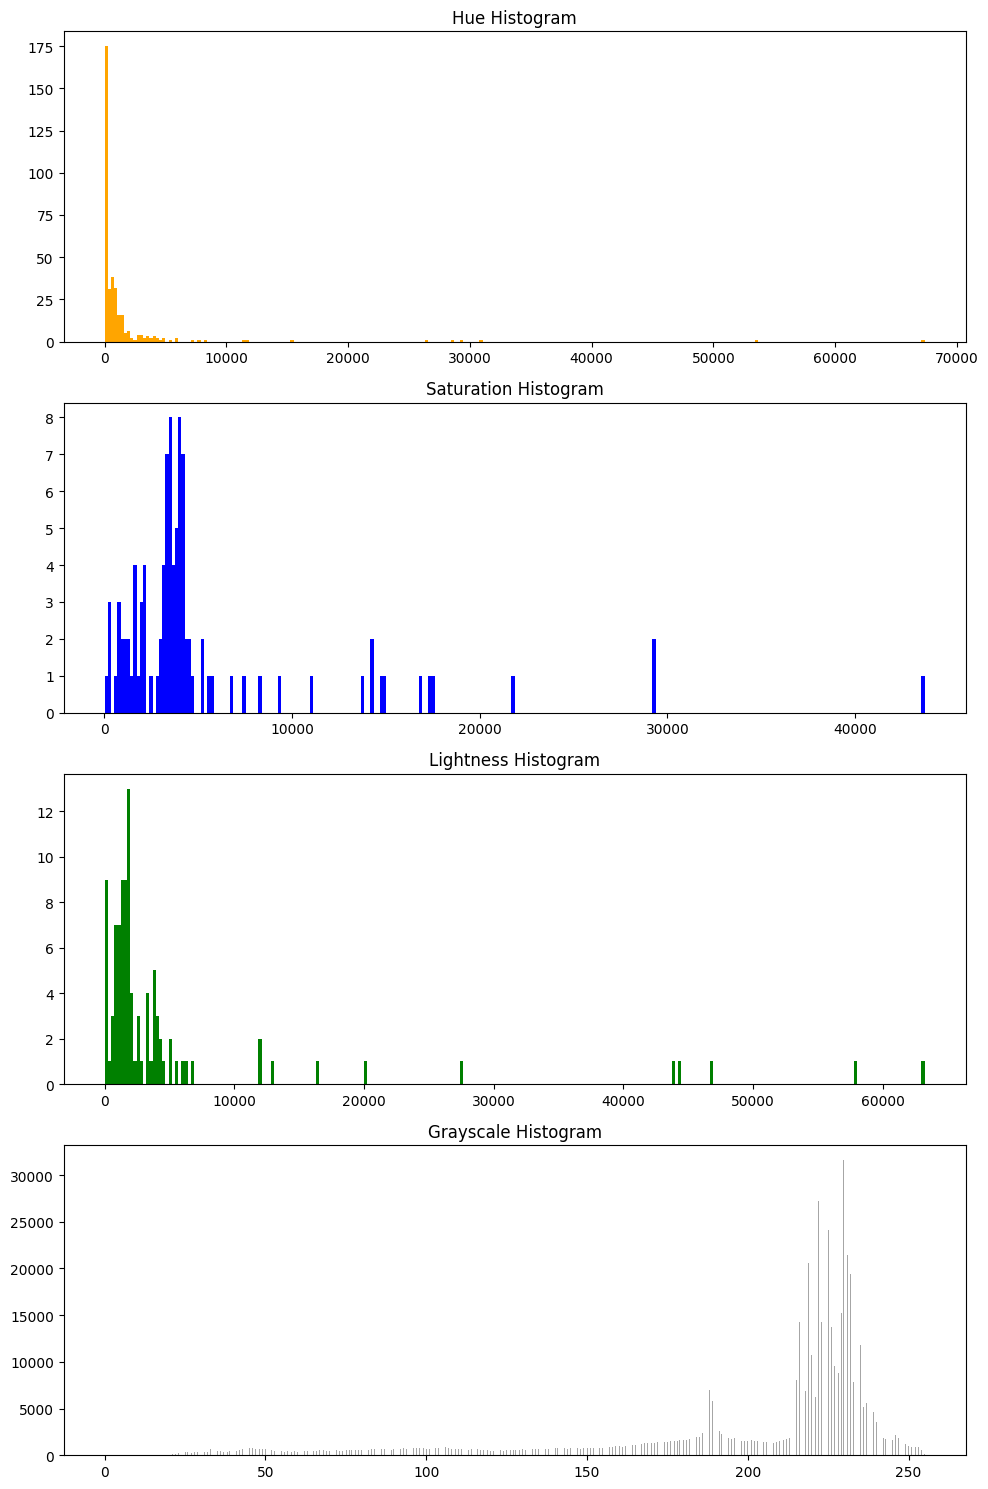

In [13]:
fig, axs = plt.subplots(4, 1, figsize=(10, 15))
axs[0].hist(hue_histogram, color='orange', bins=256)
axs[0].set_title('Hue Histogram')

axs[1].hist(saturation_histogram, color='blue', bins=256)
axs[1].set_title('Saturation Histogram')

axs[2].hist(lightness_histogram, color='green', bins=256)
axs[2].set_title('Lightness Histogram')

axs[3].hist(grayscale_values, color='gray', alpha=0.7, bins=1000)
axs[3].set_title('Grayscale Histogram')

plt.tight_layout()
plt.show()

## **7. Menentukan exposure berdasarkan brightness rata-rata**

In [14]:
average_brightness = np.mean(grayscale_values)
print(f"Rata-rata brightness: {average_brightness:.2f}")

Rata-rata brightness: 200.35


## **8. Menentukan Jenis exposure**


In [15]:
if average_brightness < 85:
    exposure = "Underexposed"
elif average_brightness > 170:
    exposure = "Overexposed"
else:
    exposure = "Normal exposure"

print(f"Jenis exposure gambar: {exposure}")

Jenis exposure gambar: Overexposed
